* The data that I choose as my main project is of the classification type.

In [419]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import utils
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.dummy import DummyClassifier

%matplotlib inline

Reading from file and allowing the data to be also hebrew

In [271]:
df = pd.read_csv('Pesticide Repository.csv',sep=',', encoding = "ISO-8859-8")
df

,מספר רשיון,סוג תכשיר,שם תכשיר,שם תכשיר אנגלי,סוג פעילות,סוג פעילות אנגלי,מספר או'ם,חומר פעיל,CAS.NO,קבוצת עמידות,...,נפח ליישום,כניסה מחדש,תקופת המתנה,שלב גידול,גיל גידול,שלב עשב,גיל עשב,אופי הפעלה,הערה גידול,סוג קרקע
0,9037,אינם קוטלי עשבים,אתרל אגרודיל,ETHREL,תכשירים בעלי היתר ליבוא מקביל,PARALLEL PERMIT IMPORT,NaN,ETHEPHON,16672-87-0,NaN,...,200 - 150 ליטר/דונם,לאחר התייבשות,0,NaN,NaN,NaN,NaN,NaN,"הטיפול בהתחלת שינוי גוון,בזני מטלי,רד רוזה וסנ...",NaN
1,9037,אינם קוטלי עשבים,אתרל אגרודיל,ETHREL,תכשירים בעלי היתר ליבוא מקביל,PARALLEL PERMIT IMPORT,NaN,ETHEPHON,16672-87-0,NaN,...,200 - 150 ליטר/דונם,לאחר התייבשות,10,NaN,NaN,NaN,NaN,NaN,"הטיפול בזן אורליאנס, יונתן ומיני דלישס.",NaN
2,9078,אינם קוטלי עשבים,דיקרזול אגרודיל,DICARZOL,תכשירים בעלי היתר ליבוא מקביל,PARALLEL PERMIT IMPORT,2757.0,FORMETANATE HYDROCHLORIDE,23422-53-9,NaN,...,75 - 30 ליטר/דונם,3 ימים מהריסוס,NaN,NaN,NaN,NaN,NaN,NaN,אין לטפל עם רמת הנגיעות עולה על 3 תריפסים לפרח,NaN
3,9078,אינם קוטלי עשבים,דיקרזול אגרודיל,DICARZOL,תכשירים בעלי היתר ליבוא מקביל,PARALLEL PERMIT IMPORT,2757.0,FORMETANATE HYDROCHLORIDE,23422-53-9,NaN,...,50 - 30 ליטר/דונם,3 ימים מהריסוס,NaN,NaN,NaN,NaN,NaN,NaN,הריסוס בשלב הפריחה,NaN
4,9078,אינם קוטלי עשבים,דיקרזול אגרודיל,DICARZOL,תכשירים בעלי היתר ליבוא מקביל,PARALLEL PERMIT IMPORT,2757.0,FORMETANATE HYDROCHLORIDE,23422-53-9,NaN,...,50 - 30 ליטר/דונם,3 ימים מהריסוס,4,NaN,NaN,NaN,NaN,NaN,"הוספת סוכר 1.5 ק""ג/ד עשויה לשפר את הקטילה",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44103,7278,אורגני,גניקן,GANIKAN,קוטלי פטריות וחיידקים,FUNGICIDES & BACTERICIDES,NaN,CANOLA OIL,120962-03-0,NaN,...,60 - 40 ליטר/דונם,.תכשיר לחקלאות אורגנית לאחר התייבשות התרסיס,3,NaN,NaN,NaN,NaN,NaN,בתוספת משטח אגוז 0.1%,NaN
44104,7326,אורגני,אי.או.אס,EOS,קוטלי חרקים ואקריות,INSECTICIDES & ACARICIDES,NaN,"DISTILLATES (PETROLEUM), HYDROTREATED LIGHT PA...",64742-55-8,ללא,...,עד נגירה,.תכשיר לחקלאות אורגנית לאחר היתייבשות,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44105,7059,אורגני,בלו שילד,BLUE SHIELD,קוטלי פטריות וחיידקים,FUNGICIDES & BACTERICIDES,3077.0,COPPER HYDROXIDE,20427-59-2,NaN,...,50 - 30 ליטר/דונם,.תכשיר לחקלאות אורגנית 48שעות,7,NaN,NaN,NaN,NaN,NaN,"המינון הנמוך בטיפול מניעה, יש להגדיל את הריכוז...",NaN
44106,7278,אורגני,גניקן,GANIKAN,קוטלי חרקים ואקריות,INSECTICIDES & ACARICIDES,NaN,CANOLA OIL,120962-03-0,NaN,...,60 - 40 ליטר/דונם,.תכשיר לחקלאות אורגנית לאחר התייבשות התרסיס,3,NaN,NaN,NaN,NaN,NaN,מנטה ספרדית. בתוספת משטח אגוז 0.1%,NaN


* I try to predict the "סוג תכשיר" column, or in english the "preparation type num" column. I will try to get all the other data that in the table and find out which "סוג תכשיר" he is: 'אינם קוטלי עשבים' ,'קוטלי עשבים'  or 'אורגני'

First I will clean the database so it will be only with numbers and without words using dictionris

In [272]:
def str_array_to_dictionry(my_list):
    my_dict = dict() 
    for index,value in enumerate(my_list):
        my_dict[value] = index
    return my_dict

In [273]:
def add_new_column(old_name, new_name):
    value = str_array_to_dictionry(pd.unique(df[old_name]))
    print(value)
    new_column = []
    for val in df[old_name]:
        new_column.append(value[val])
    df[new_name] = new_column

# Transform The Columns to numeric

In [308]:
add_new_column("סוג תכשיר", 'preparation type num')

{'אינם קוטלי עשבים': 0, 'קוטלי עשבים': 1, 'אורגני': 2}


In [309]:
add_new_column("סוג פעילות אנגלי", 'activity type num')

{'PARALLEL PERMIT IMPORT': 0, 'HERBICIDES & DEFOLIANTS': 1, 'MICRONUTRIENTS': 2, 'NEMATICIDES': 3, 'PLANT GROWTH REGULATORS': 4, 'SOIL DISINFECTANT': 5, 'FUNGICIDES & BACTERICIDES': 6, 'INSECTICIDES &   ACARICIDES': 7, 'REPELLENTS FOR BIRDS & MAMMALS': 8, 'ADJUVANTS': 9, 'INSECT ATTRACTANTS': 10, 'PLANT PROTECTION PRODUCTS FOR HOME GARDENS': 11, 'NATIONAL ORGANIC PROGRAM (NOP)': 12, 'WOUND SEALING MATERIALS': 13, 'POSTHARVEST TREATMENTS': 14, 'SEED TREATMENT': 15, 'MOLLUSCICIDES': 16, 'FUMIGANTS': 17, 'RODENTICIDES': 18, 'READY TO USE': 19, 'FERTILIZERS&SOIL CONDITIONNERS': 20}


In [310]:
add_new_column("סוג קרקע", 'field type num')

{nan: 0, 'קלה': 1, 'כבדה': 2, 'בכל הקרקעות': 3, 'בינונית כבדה': 4, 'קלה בינונית כבדה': 5, 'בינונית': 6, 'קלה לס': 7, 'לס': 8, 'קלה בינונית': 9, 'חול לס': 10, 'לס חול לס': 11, 'בינונית לס': 12, 'בינונית לס חול לס': 13, 'בינונית כבדה לס': 14, 'בינונית חול לס': 15, 'כבדה לס': 16, 'קלה בינונית כבדה בכל הקרקעות': 17, 'בינונית כבדה חול לס': 18}


In [311]:
add_new_column("חומר פעיל", 'active ingredient num')

{'ETHEPHON': 0, 'FORMETANATE HYDROCHLORIDE': 1, 'FENAZAQUIN': 2, 'SPIROTETRAMAT': 3, 'FLUDIOXONIL': 4, 'CYPRODINIL': 5, 'KRESOXIM METHYL': 6, 'BOSCALID': 7, 'PYRACLOSTROBIN': 8, 'CHLORANTRANILIPROLE': 9, 'MANCOZEB': 10, 'MEFENOXAM (ראה METALAXYL M)': 11, 'OXYFLUORFEN': 12, 'PROPAQUIZAFOP': 13, 'CARFENTRAZONE ETHYL': 14, 'DIURON': 15, 'BROMACIL': 16, 'GLYPHOSATE': 17, 'MECOPROP-P': 18, 'CLOQUINTOCET MEXYL': 19, 'INDAZIFLAM': 20, 'TRIBENURON METHYL': 21, 'GLUFOSINATE AMMONIUM': 22, 'TRIFLOXYSULFURON': 23, '2,4-D AMINE SALT': 24, 'CYPROSULFAMIDE': 25, 'SULFENTRAZONE': 26, 'METRIBUZIN': 27, 'BENTAZONE': 28, '2,4-D': 29, 'PROPYZAMIDE': 30, 'PYRAFLUFEN-ETHYL': 31, 'BROMOXYNIL': 32, 'GLYPHOSATE ISOPROPYL AMINE SALT': 33, 'METAMITRON': 34, 'CHLORSULFURON': 35, 'TRICLOPYR BUTOTYL': 36, 'HALOXYFOP R METHYL': 37, 'CHLORTHAL DIMETHYL': 38, 'FLUAZIFOP-P-BUTYL': 39, 'FOMESAFEN': 40, 'FLORASULAM': 41, 'FLUMETSULAM': 42, 'CLETHODIM': 43, 'DIFLUFENICAN': 44, 'FLUROCHLORIDONE': 45, 'SULFOMETURON METHYL'

In [312]:
add_new_column('פורמולציה אנגלי', 'formulation num')

{'SL': 0, 'SP': 1, 'SC': 2, 'WG': 3, 'EC': 4, 'SG': 5, 'PX': 6, 'EW': 7, 'WP': 8, 'L': 9, 'OD': 10, 'CS': 11, 'DC': 12, 'OL': 13, 'R': 14, 'ZC': 15, 'FS': 16, 'SE': 17, 'RB': 18, 'DP': 19, 'GR': 20, 'E': 21, 'GB': 22, 'TB': 23, 'WS': 24, 'GA': 25, 'GE': 26, 'CB': 27, 'AE': 28, 'UL': 29, 'PA': 30, 'CR': 31, 'PE': 32, 'SS': 33, 'HN': 34}


In [313]:
add_new_column('רעילות אנגלי', 'toxicity num')

{'CREATURES OF THE SEA': 0, 'HIGHLY TOXIC TO BEES': 1, 'FISH,BEES & SEA CREATURES': 2, 'FISH & SEA CREATURES': 3, nan: 4, 'VIRTUALLY NON TOXIC': 5, 'FISH': 6, 'SLIGHTLY TOXIC TO BEES': 7, 'MODERATELY TOXIC TO BEES': 8, 'BIRDS': 9, 'FISH & BIRDS': 10, 'FISH & BEES': 11, 'SEAWEED': 12, 'BEES & SEA CREATURES': 13, 'BEES': 14, 'FISH, BEES & BIRDS': 15, 'BIRDS & BEES': 16}


In [314]:
add_new_column('דרגת רעילות אנגלי','degree of toxicity num')

{'Dangerous': 0, 'Toxic': 1, 'Dangerous for health': 2, 'Generators of toxic gases': 3, nan: 4, 'Very toxic': 5}


In [315]:
add_new_column('קבוצת גידולים אנגלי', 'crop group num')

{'DECIDUOUS': 0, 'FLOWERS': 1, 'VEGETABLES': 2, 'CITRUS FRUIT': 3, 'HERBS': 4, 'FIELD CROPS': 5, 'FODDER & FORAGE': 6, 'SUBTROPICAL TREES': 7, 'Different uses': 8, 'INDUSTRIAL CROPS': 9, 'SEEDS\\GRAINS': 10, 'FOREST TREES': 11, 'FRUITS (for residue)': 12, 'medicinal plants': 13}


In [316]:
add_new_column('קבוצת נגעים אנגלי', 'lesion group num')

{'OTHER TREATMENT': 0, 'INSECTICIDES': 1, 'FUNGICIDES': 2, nan: 3, 'NEMATODOS': 4, 'WEEDS': 5}


In [317]:
new_column = []
for index,value in enumerate(df['ריכוש חומר פעיל אנגלי']):
    try:
        if value.split(" ")[1] == "%":
            if value.split(" ")[0]:
                value = float(value.split(" ")[0]) * 10
            else:
                value = 1
        else:
            value = value.split(" ")[0]
    except:
        value=0
    new_column.append(value)
df['active substance concentration num'] = new_column

Changing column name to english

In [318]:
df['license number'] = df['מספר רשיון']
df['Preparation name'] = df['שם תכשיר אנגלי']

In [321]:
clean_data = df[['license number', 'Preparation name', 'preparation type num', 'activity type num', 'field type num', 'active ingredient num', 'formulation num', 'toxicity num', 'degree of toxicity num', 'crop group num', 'lesion group num', 'active substance concentration num']]

In [322]:
clean_data = clean_data.drop(clean_data[(clean_data['active substance concentration num']==0 )| (clean_data['active substance concentration num']=='')].index)

In [323]:
clean_data = clean_data.drop_duplicates(subset='license number')
clean_data

,license number,Preparation name,preparation type num,activity type num,field type num,active ingredient num,formulation num,toxicity num,degree of toxicity num,crop group num,lesion group num,active substance concentration num
0,9037,ETHREL,0,0,0,0,0,0,0,0,0,480
2,9078,DICARZOL,0,0,0,1,1,1,1,1,1,500.0
8,9016,MAGISTER AGRODIL,0,0,0,2,2,0,1,2,1,200
9,9094,MOVENTO 100 - INTAGRO,0,0,0,3,2,0,0,3,1,100
11,9098,DICARZOL-Intagro,0,0,0,1,1,3,1,1,1,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...
43124,1879,T.O.G PASTE,0,4,0,74,30,5,0,1,0,27.0
43321,4470,SPLAT CYDIA,0,10,0,421,30,5,0,0,1,100.0
43808,7486,POLYSULPHATE GRANULAR,2,20,0,420,20,4,0,2,0,890.0
44032,4214,CHELAL Zn,0,2,0,485,0,4,0,7,0,70.0


In [324]:
# Description
print(clean_data.describe())


       license number  preparation type num  activity type num  \
count     1204.000000           1204.000000        1204.000000   
mean      3315.029070              0.431063           6.719269   
std       2310.881576              0.717480           4.548721   
min          2.000000              0.000000           0.000000   
25%       1527.000000              0.000000           4.000000   
50%       1990.500000              0.000000           6.000000   
75%       4399.500000              1.000000           7.000000   
max      11028.000000              2.000000          20.000000   

       field type num  active ingredient num  formulation num  toxicity num  \
count     1204.000000            1204.000000      1204.000000   1204.000000   
mean         0.087209             177.866279         6.779900      3.542359   
std          0.661143             122.488554         7.597341      2.994431   
min          0.000000               0.000000         0.000000      0.000000   
25%       

preparation_num distribution


In [327]:
print(clean_data.groupby('preparation type num').size())


preparation type num
0    847
1    195
2    162
dtype: int64


In [328]:
clean_data.info

<bound method DataFrame.info of        license number       Preparation name  preparation type num  \
0                9037                 ETHREL                     0   
2                9078               DICARZOL                     0   
8                9016       MAGISTER AGRODIL                     0   
9                9094  MOVENTO 100 - INTAGRO                     0   
11               9098       DICARZOL-Intagro                     0   
...               ...                    ...                   ...   
43124            1879            T.O.G PASTE                     0   
43321            4470            SPLAT CYDIA                     0   
43808            7486  POLYSULPHATE GRANULAR                     2   
44032            4214              CHELAL Zn                     0   
44073            7293                SULPHUR                     2   

       activity type num  field type num  active ingredient num  \
0                      0               0                    

# Splitting The Data

I will split my data into two parametrs:
* **X** - The data that I give to the model
* **y** - The data that I want to predict

In [387]:
X = clean_data.drop(['preparation type num', 'Preparation name'],axis=1)
y = clean_data['preparation type num']

After choosing the columns that I want from the choosen data, I will split the data into test and traind variables:/\

In [427]:

X_test, X_train, y_test, y_train= train_test_split(X, y, test_size = 0.2, random_state=30)
pesticides = X_test.copy()

In [428]:
pesticides = pesticides.set_index('license number')
pesticides

,activity type num,field type num,active ingredient num,formulation num,toxicity num,degree of toxicity num,crop group num,lesion group num,active substance concentration num
license number,,,,,,,,,
4067,6,0,10,3,0,0,2,2,304.0
7461,10,0,298,14,5,0,0,1,86.1
1379,11,0,100,2,0,2,3,1,350
1918,6,0,92,2,3,0,2,2,80
7284,6,0,254,2,5,0,4,2,13.4
...,...,...,...,...,...,...,...,...,...
1761,7,0,90,20,0,0,3,1,2.0
4099,10,0,298,14,5,0,0,1,86.1
11002,12,0,143,27,0,0,7,1,0.2


In [390]:
print('pesticides:   ', y_test.shape)
print('test_set:   ', X_test.shape)

pesticides:    (963,)
test_set:    (963, 10)


# Analyze the Data by Comparing the Different columns

C:\Users\moria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



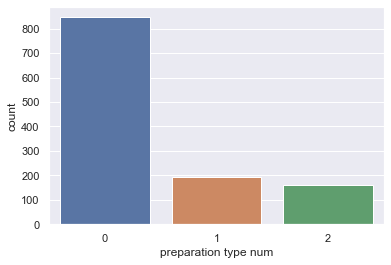

In [429]:
sns.countplot(clean_data['preparation type num'],label="Count")
plt.show()

# Creating Dummy Model

In [422]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_train, y_train)

0.7095435684647303

# Finding Model

I will try to find the best model to analize my data:

First of all, I will try to use the KNN model, and find the best number of nearest neighbors:

The best accuracy of the knn model is when k = 11 , and the score is: 0.8328141225337488


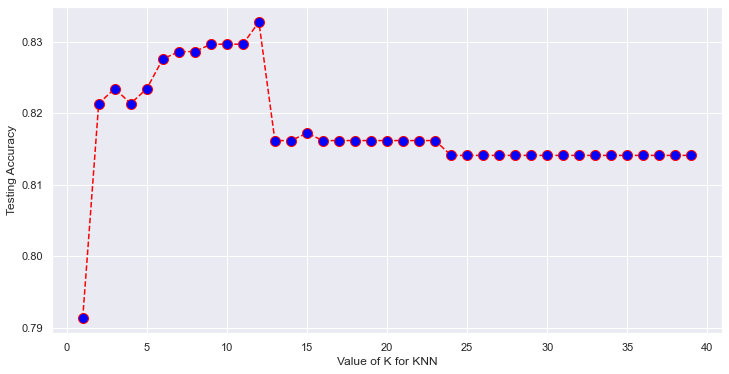

In [417]:
k_range = range(1,40)
scores = []
for k in k_range:
    knn_ = KNeighborsClassifier(n_neighbors=k)
    knn_.fit(X_train, y_train)
    y_pred = knn_.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.figure(figsize=(12, 6))
plt.plot(k_range, scores,color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

# Finding the maximum k - the number of nearest neighbors:
best_k = scores.index(max(scores))
print("The best accuracy of the knn model is when k =",best_k, ", and the score is:",(max(scores))) 

In [409]:
lr = SVC(kernel='linear')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   ", accuracy)

accuracy:    0.9688473520249221


According to the models that I checked, the best accuracy scores is when I chosing svm.svc model with kernel='linear'.

In [415]:
print("The accuracy score is:",accuracy, ", or in another word:",(accuracy*100),"%") 

The accuracy score is: 0.9688473520249221 , or in another word: 96.88473520249221 %


# Conclusion

* The accuracy score of the chosen model is 96.88%.

* I have seen that there is a connection between the components of the pesticide material, such as the amount of toxic substance, type of activity, type of soil, etc. and the type of preparation - non-herbicides, herbicides, organic.